In [ ]:
import pandas as pd #for importing dataset
import numpy as nm #for doing mathematical operations
from sklearn.model_selection import train_test_split as ttp #to break dataset for training and testing
from sklearn.metrics import classification_report # to generate classification report
import re #for data cleaning purpose
import string #to deal with text data
import matplotlib.pyplot as plt #for visualizing dataset

In [ ]:
data_true=pd.read_csv("/content/drive/MyDrive/dataset/fake news/fake news/True.csv")
data_fake=pd.read_csv("/content/drive/MyDrive/dataset/fake news/fake news/Fake.csv")

In [ ]:
data_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
data_true.tail()

,title,text,subject,date
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


In [ ]:
data_fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
data_true.shape, data_fake.shape

((21417, 4), (23481, 4))

In [ ]:
data_true["class"]=1
data_fake["class"]=0

In [ ]:
data_true_manual_testing = data_true.tail(10)
for i in range(21416,21406,-1):
    data_true.drop([i],axis=0, inplace=True)#removing those 10 values from original dataset

data_fake_manual_testing = data_fake.tail(10)
for i in range(21416,21406,-1):
    data_fake.drop([i],axis=0, inplace=True)#removing those 10 values from original dataset

In [ ]:
data_manual_testing = pd.concat([data_fake_manual_testing, data_true_manual_testing], axis=0)
data_manual_testing.to_csv("manual_testing.csv ")

In [ ]:
data_merge = pd.concat([data_fake,data_true],axis=0)
data_merge.head(10)#displaying first 10 values after above operation

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4449
politics            6841
politicsNews       11272
worldnews          10135
Name: text, dtype: int64


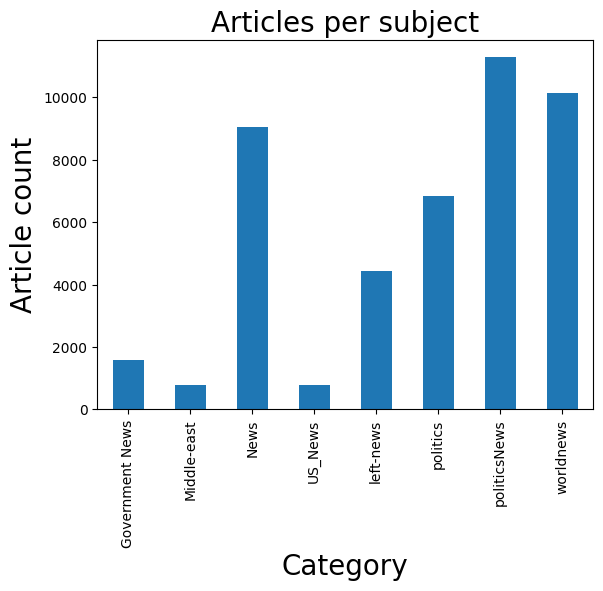

In [ ]:
print(data_merge.groupby(['subject'])['text'].count())
data_merge.groupby(['subject'])['text'].count().plot(kind="bar")
plt.title("Articles per subject",size=20)
plt.xlabel("Category",size=20)
plt.ylabel("Article count",size=20)
plt.show()

class
0    23471
1    21407
Name: text, dtype: int64
0 = Fake news
1 = True news


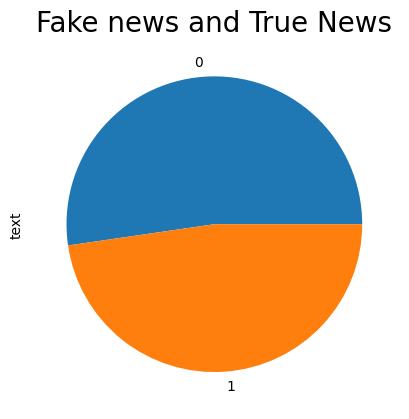

In [ ]:
print(data_merge.groupby(['class'])['text'].count())
print("0 = Fake news\n1 = True news")
data_merge.groupby(['class'])['text'].count().plot(kind="pie")
plt.title("Fake news and True News",size=20)
plt.show()

In [ ]:
data = data_merge.drop(["title","subject","date"], axis=1)
data.head(10) #displaying remaining dataset

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
5,The number of cases of cops brutalizing and ki...,0
6,Donald Trump spent a good portion of his day a...,0
7,In the wake of yet another court decision that...,0
8,Many people have raised the alarm regarding th...,0
9,Just when you might have thought we d get a br...,0


In [ ]:
data=data.sample(frac=1)
data.head(10)

,text,class
21653,The Army can t be bothered with defending or p...,0
18778,Americans were stunned when they were told the...,0
17052,"MARAWI CITY, Philippines (Reuters) - War might...",1
22666,Tune in to the Alternate Current Radio Network...,0
17299,"Fortunately, our useless Secretary of State Jo...",0
1683,UNITED NATIONS (Reuters) - North Korea’s nucle...,1
11682,JOHANNESBURG (Reuters) - South Africa s ruling...,1
21058,PHNOM PENH (Reuters) - Cambodian Prime Ministe...,1
6644,WASHINGTON (Reuters) - Four Senators on Sunday...,1
20391,Dolly Kyle has written a scathing tell all b...,0


In [ ]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [ ]:
def filtering(data):
    text=data.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub("\\W"," ",text)
    text=re.sub('https?://\s+|www\.S+','',text)
    text=re.sub('<.*?>+','',text)
    text=re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text=re.sub('\w*\d\w*','',text)
    return text

In [ ]:
data["text"]= data["text"].apply(filtering)
data.head(10)

,text,class
21653,the army can t be bothered with defending or p...,0
18778,americans were stunned when they were told the...,0
17052,marawi city philippines reuters war might...,1
22666,tune in to the alternate current radio network...,0
17299,fortunately our useless secretary of state jo...,0
1683,united nations reuters north korea s nucle...,1
11682,johannesburg reuters south africa s ruling...,1
21058,phnom penh reuters cambodian prime ministe...,1
6644,washington reuters four senators on sunday...,1
20391,dolly kyle has written a scathing tell all b...,0


In [ ]:
x=data["text"]
y=data["class"]

In [ ]:
x_train,x_test,y_train,y_test=ttp(x,y,test_size=0.25,random_state=0)